<a href="https://colab.research.google.com/github/witonisaurus/MAT420/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# test data 
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
X = np.linspace(0, 1, 101)

In [28]:
# finds a linear interpolation of a given array found from a data set
# x is an array containing experimental, independent, data points
# y is an array containing experimental, dependent, data points
# X is an array of test data points
# outputs an array of same size as X representing the found linear interpolation

def my_lin_interp(x, y, X):
  Y = []
  curr_range = 0
  for pnt in X:
    if pnt > x[curr_range + 1] and curr_range < len(x) - 2:
      curr_range += 1
    
    m = (y[curr_range + 1] - y[curr_range]) / (x[curr_range + 1] - x[curr_range])
    Y.append(m*(pnt-x[curr_range]) + y[curr_range])

  return Y

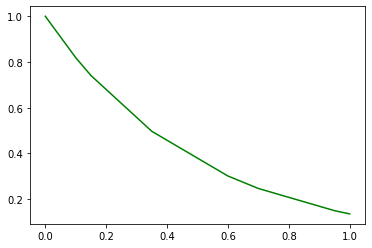

In [8]:
Y = my_lin_interp(x, y, X)
plt.plot(X, Y, 'g')
plt.show()

In [38]:
# finds a cubic interpolation of a given array found from a data set
# x is an array containing experimental, independent, data points
# y is an array containing experimental, dependent, data points
# X is an array of test data points
# outputs an array of same size as X representing the found cubic interpolation
def my_cubic_spline(x, y, X):
  Y = []

  i = 1
  for pnt in X:
    if (i+1) < (len(x)-1) and pnt > x[i+1]:
      i += 1

    b = np.array(
        [
         y[i-1],
         y[i],
         y[i],
         y[i+1],
         0,
         0,
         0,
         0
        ]
    )

    x_1 = x[i-1]
    x_2 = x[i]
    x_3 = x[i+1]
    A = np.array(
        [
         [x_1**3, x_1**2, x_1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, x_2**3, x_2**2, x_2, 1],
         [x_2**3, x_2**2, x_2, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, x_3**3, x_3**2, x_3, 1],
         [3*(x_2**2), 2*x_2, 1, 0, -3*(x_2**2), -2*x_2, -1, 0],
         [6*x_2, 2, 0, 0, -6*x_2, -2, 0, 0],
         [6*x_1, 2, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 6*x_3, 2, 0, 0]
        ]
    )
    
    coeffs = np.matmul(np.linalg.inv(A), b)[:4]
    
    input = np.array([pnt**3, pnt**2, pnt, 1])
    interp = np.dot(coeffs, input)
    Y.append(interp)

  return Y



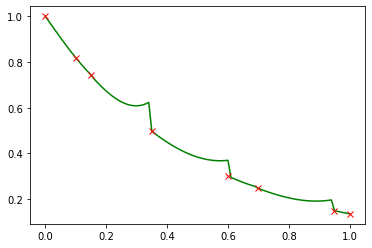

In [39]:
Y = my_cubic_spline(x, y, X)
plt.plot(X, Y, 'g')
plt.plot(x, y, 'rx')
plt.show()